In [0]:
# Importing Libraries

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Nadam, Adamax, SGD
from keras.callbacks import TensorBoard
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [0]:
#Loading the data
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
print('\nX_train shape:', X_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', y_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
n_cat = len(class_names)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#One-Hot Encoding
y_train = keras.utils.to_categorical(y_train, n_cat)
y_test = keras.utils.to_categorical(y_test, n_cat)

#Normalize the data
X_train = X_train/255       
X_test = X_test/255

print(' \n Before creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} ')
print(f' y_train Shape: {y_train.shape} ')
print(f' X_test Shape: {X_test.shape} ')
print(f' y_test Shape: {y_test.shape} \n')

#Perform Train-Validation split
X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 13)

print(' After creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} ')
print(f' y_train Shape: {y_train.shape} ')
print(f' X_val Shape: {X_val.shape} ')
print(f' y_val Shape: {y_val.shape} \n')


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)
 
 Before creating Validation set: 


 X_train Shape: (50000, 32, 32, 3) 
 y_train Shape: (50000, 10) 
 X_test Shape: (10000, 32, 32, 3) 
 y_test Shape: (10000, 10) 

 After creating Validation set: 


 X_train Shape: (33500, 32, 32, 3) 
 y_train Shape: (33500, 10) 
 X_val Shape: (16500, 32, 32, 3) 
 y_val Shape: (16500, 10) 



 Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


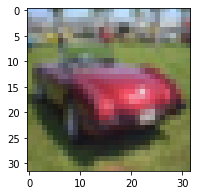

In [0]:
plt.figure(figsize=(3,3))
n_training = len(X_train)
gen_data = np.random.randint(0,n_training) 
plt.imshow(X_train[gen_data])
print(f' Label: {y_train[gen_data]}')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


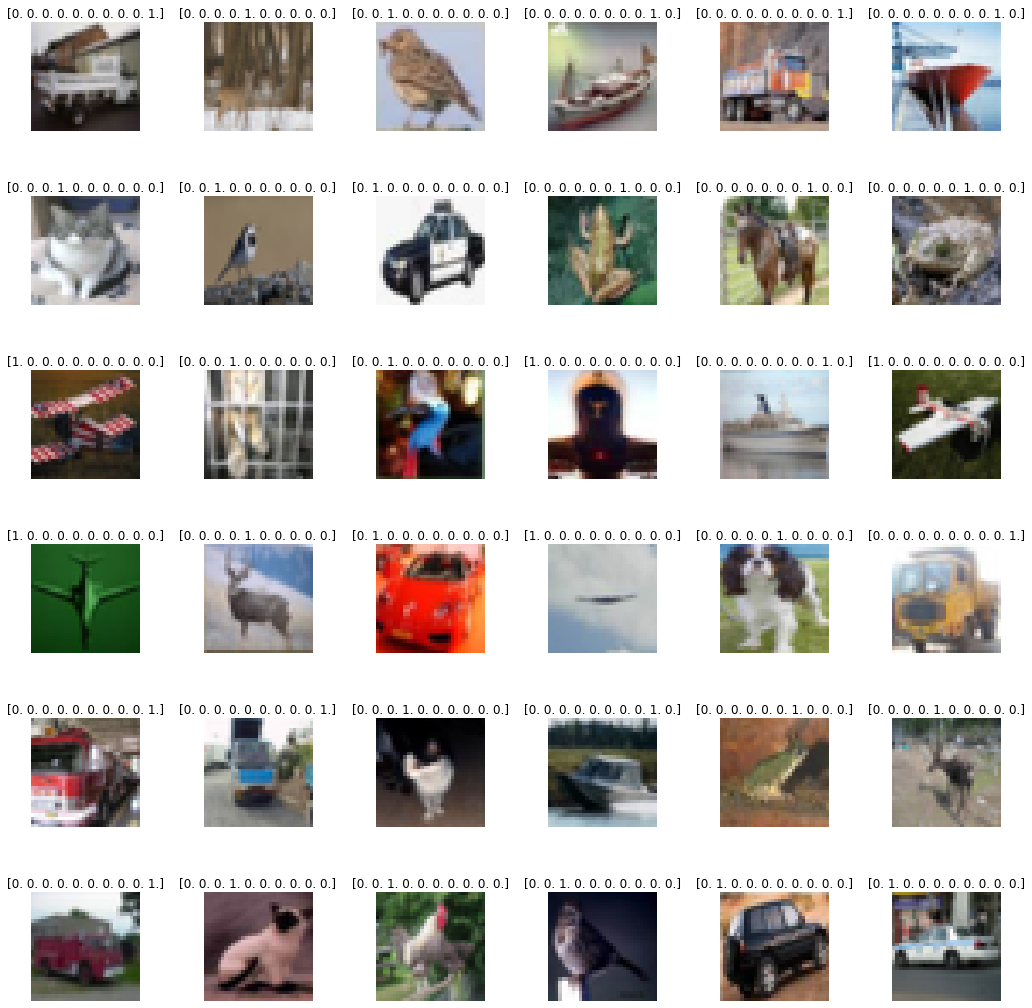

In [0]:
fig, axes = plt.subplots(6,6, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, 36):
    gen_data = np.random.randint(0, n_training) 
    axes[i].imshow(X_train[gen_data],cmap=plt.cm.binary)  #?
    axes[i].set_title(y_train[gen_data])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.6)

In [0]:
#General CNN Model function for various Optimizers
epochs = 150 
batch_size = 32

def get_model():
  cnn = Sequential()

  cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same',input_shape = X_train.shape[1:]))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2,2))
  cnn.add(Dropout(0.4))
  cnn.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
  cnn.add(MaxPooling2D(2,2))
  cnn.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2,2))
  cnn.add(Dropout(0.4))

  cnn.add(Flatten())

  cnn.add(Dense(units = 256, activation = 'relu'))
  cnn.add(Dense(units = 512, activation = 'relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dense(units = 10, activation = 'softmax'))

  return cnn

In [0]:
#Optimizer 1: Adam (Adaptive Moment Estimation)

cnn_adam = get_model()
cnn_adam.summary()
cnn_adam.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_adam = cnn_adam.fit(X_train, y_train, batch_size = batch_size, 
                              epochs=epochs, validation_split= 0.33, shuffle=True, verbose =1)

scores_adam = cnn_adam.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_adam[0])
print('Test accuracy:', scores_adam[1])
cnn_adam.save('cnn_adam.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 512)        

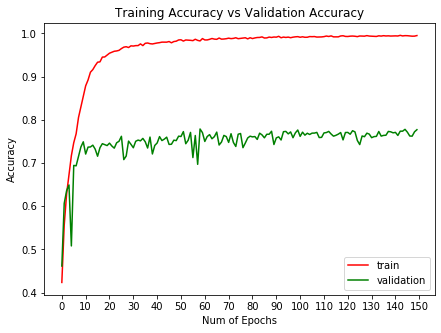

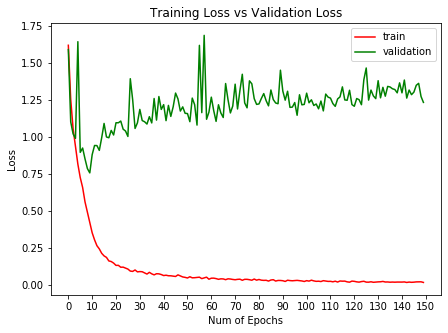

In [0]:
#Plot the Accuracy and Loss curve for  Adam Optimizer 
plt.figure(0)
plt.plot(history_adam.history['acc'],'r')
plt.plot(history_adam.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_adam.history['loss'],'r')
plt.plot(history_adam.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [0]:
#Optimizer 2: RMSProp( Root Mean Square Propogation)

cnn_rms = get_model()
cnn_rms.summary()
cnn_rms.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_rmsprop = cnn_rms.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.33 , shuffle = True, verbose = 1)

scores_rms = cnn_rms.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_rms[0])
print('Test accuracy:', scores_rms[1])
cnn_rms.save('cnn_rms.h5')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 512)       

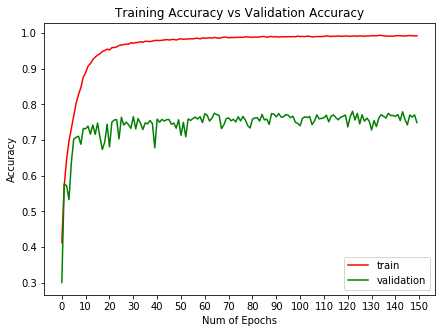

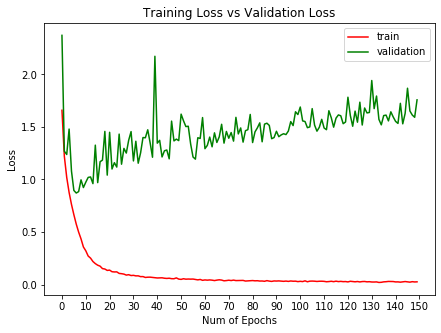

In [0]:
#Plot the Accuracy and Loss curve for  RMSProp Optimizer 
plt.figure(0)
plt.plot(history_rmsprop.history['acc'],'r')
plt.plot(history_rmsprop.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_rmsprop.history['loss'],'r')
plt.plot(history_rmsprop.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [0]:
#Optimzer 3: Adadelta

cnn_adadelta = get_model()
cnn_adadelta.summary()
cnn_adadelta.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
history_adadelta = cnn_adadelta.fit(X_train,y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.33 , shuffle = True, verbose = 1)
cnn_adadelta.save('cnn_adadelta.h5')

scores_adadelta = cnn_adadelta.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_adadelta[0])
print('Test accuracy:', scores_adadelta[1])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0   

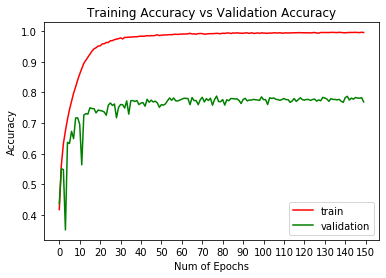

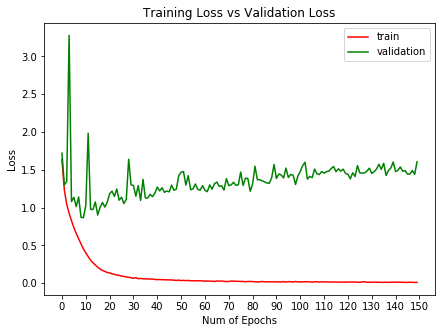

In [0]:
#Plot the Accuracy and Loss curve for  Adadelta Optimizer 
plt.figure(0)
plt.plot(history_adadelta.history['acc'],'r')
plt.plot(history_adadelta.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_adadelta.history['loss'],'r')
plt.plot(history_adadelta.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [0]:
#Optimizer 4: Adagrad (Adaptive Gradient Algorithm)

cnn_adagrad = get_model()
cnn_adagrad.summary()
cnn_adagrad.compile(loss='categorical_crossentropy', optimizer = Adagrad(), metrics=['accuracy'])
history_adagrad = cnn_adagrad.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.33 , shuffle = True, verbose = 1)
cnn_adagrad.save('cnn_adagrad.h5')

scores_adagrad = cnn_adagrad.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_adagrad[0])
print('Test accuracy:', scores_adagrad[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 512)        

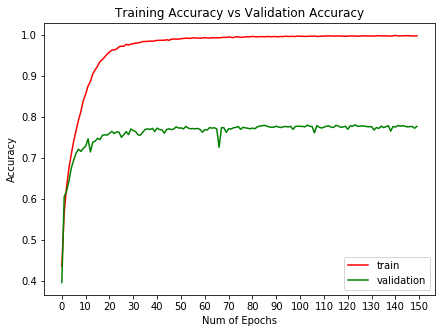

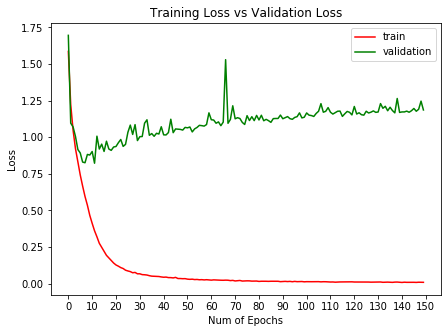

In [0]:
#Plot the Accuracy and Loss curve for  Adagrad Optimizer 
plt.figure(0)
plt.plot(history_adagrad.history['acc'],'r')
plt.plot(history_adagrad.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_adagrad.history['loss'],'r')
plt.plot(history_adagrad.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [0]:
#Optimzer 5: Adamax

cnn_adamax = get_model()
cnn_adamax.summary()
cnn_adamax.compile(loss='categorical_crossentropy', optimizer = Adamax(), metrics=['accuracy'])
history_adamax = cnn_adamax.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.33 , shuffle = True, verbose = 1)
cnn_adamax.save('cnn_adamax.h5')

scores_adamax = cnn_adamax.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_adamax[0])
print('Test accuracy:', scores_adamax[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 512)        

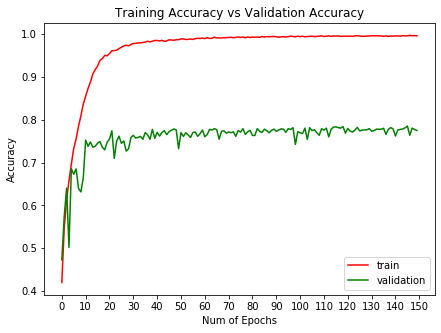

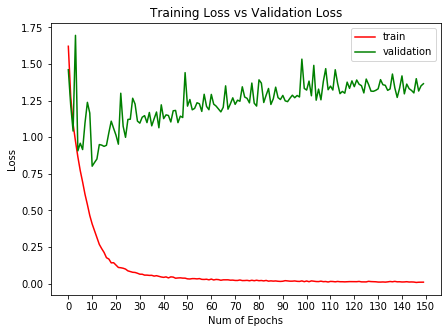

In [0]:
#Plot the Accuracy and Loss curve for  Adamax Optimizer 
plt.figure(0)
plt.plot(history_adamax.history['acc'],'r')
plt.plot(history_adamax.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_adamax.history['loss'],'r')
plt.plot(history_adamax.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [0]:
# Optimizer 6: SGD (Stochastic Gradient Descent) 

cnn_sgd = get_model()
cnn_sgd.summary()
cnn_sgd.compile(loss='categorical_crossentropy', optimizer = SGD(), metrics=['accuracy'])
history_sgd = cnn_sgd.fit(X_train,y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.33 , shuffle = True, verbose = 1)
cnn_sgd.save('cnn_sgd.h5')

scores_sgd = cnn_sgd.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_sgd[0])
print('Test accuracy:', scores_sgd[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 512)        

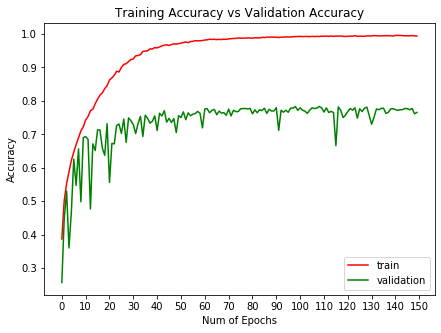

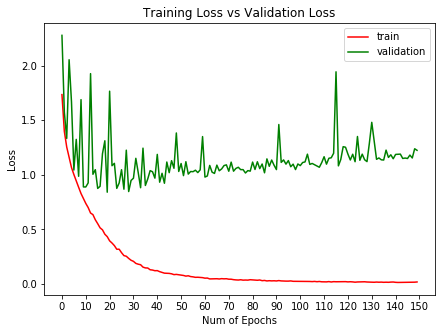

In [0]:
#Plot the Accuracy and Loss curve for  Stochastic Gradient Descent Optimizer 
plt.figure(0)
plt.plot(history_sgd.history['acc'],'r')
plt.plot(history_sgd.history['val_acc'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7,5 )
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history_sgd.history['loss'],'r')
plt.plot(history_sgd.history['val_loss'],'g')
plt.xticks(np.arange(0, 160, 10))
plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

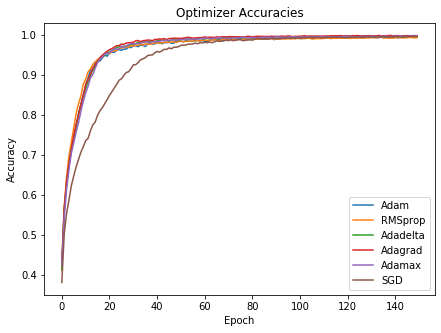

In [0]:
# Overall Accuracy Plot comparing the various Optimzers used in designing the convolutional neural network

plt.plot(history_adam.history['acc'])
plt.plot(history_rmsprop.history['acc'])
plt.plot(history_adadelta.history['acc'])
plt.plot(history_adagrad.history['acc'])
plt.plot(history_adamax.history['acc'])
plt.plot(history_sgd.history['acc'])

plt.title('Optimizer Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam', 'RMSprop', 'Adadelta', 'Adagrad','Adamax','SGD'])
plt.savefig('Overall-Accuracy.jpg', dpi=1200)

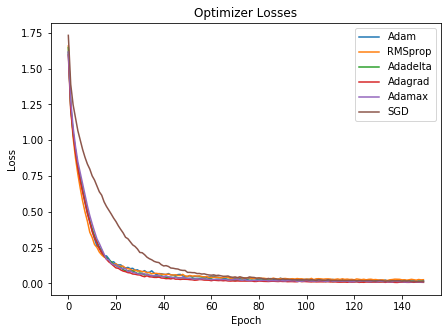

In [0]:
# Overall Loss Plot comparing the various Optimzers used in designing the convolutional neural network

plt.plot(history_adam.history['loss'])
plt.plot(history_rmsprop.history['loss'])
plt.plot(history_adadelta.history['loss'])
plt.plot(history_adagrad.history['loss'])
plt.plot(history_adamax.history['loss'])
plt.plot(history_sgd.history['loss'])

plt.title('Optimizer Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Adam', 'RMSprop', 'Adadelta', 'Adagrad','Adamax','SGD'])
plt.savefig('Overall-Loss.jpg', dpi=1200)